In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

from helper import getModelName
from cleaning import load_data, get_dictionaries, resize, resize_square, get_dataloader, get_prominent_mask
from visualizer import imshow, getBitMask, getMaskedImg, tensorToNpImg, thresholdProbMask, extractProminent, plotCurve, plotPerformance
from metrics import getPercentMask, calculateIoU, calculateTotalIoU, getLoss
from extractNet_simple import extractNet_simple
from trainer import trainModel
from data_loader import ImageMaskDataset

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [3]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/data.zip

--2019-03-20 05:56:54--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/data.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data.zip [following]
--2019-03-20 05:56:55--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9812038 (9.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   9.36M  --.-KB/s    in 0.07s   

2019-03-20 05:56:55 (143 MB/s) - ‘data.zip’ saved [9812038/9812038]



In [4]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
  inflating: data/images/63.jpg      
  inflating: data/images/189.jpg     
  inflating: data/images/77.jpg      
  inflating: data/images/638.jpg     
  inflating: data/images/604.jpg     
  inflating: data/images/162.jpg     
  inflating: data/images/176.jpg     
  inflating: data/images/88.jpg      
  inflating: data/images/610.jpg     
  inflating: data/images/348.jpg     
  inflating: data/images/360.jpg     
  inflating: data/images/406.jpg     
  inflating: data/images/412.jpg     
  inflating: data/images/374.jpg     
  inflating: data/images/599.jpg     
  inflating: data/images/228.jpg     
  inflating: data/images/214.jpg     
  inflating: data/images/572.jpg     
  inflating: data/images/566.jpg     
  inflating: data/images/200.jpg     
  inflating: data/images/758.jpg     
  inflating: data/images/770.jpg     
  inflating: data/images/764.jpg     
  inflating: data/images/765.jpg     
  inflating: data/images

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip
!rm -rf data_loader.py

In [0]:
# Form dataset

transform = transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes

size = len(dataset)
   
train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
  
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

train_data = train_data[:10]
valid_data = valid_data[:10]

# Making dataloader

train = DataLoader(train_data, batch_size=2, shuffle=True, num_workers=1)
valid = DataLoader(valid_data, batch_size=2, shuffle=True, num_workers=1)

In [0]:
net = extractNet_simple()

Epoch:0, Train IoU:0.3164, Train Loss:0.3585|Valid IoU:0.3613, Valid Loss:0.3483
Epoch:1, Train IoU:0.3117, Train Loss:0.3540|Valid IoU:0.3534, Valid Loss:0.3484
Epoch:2, Train IoU:0.3088, Train Loss:0.3451|Valid IoU:0.3432, Valid Loss:0.3478
Epoch:3, Train IoU:0.3095, Train Loss:0.3340|Valid IoU:0.3326, Valid Loss:0.3501
Epoch:4, Train IoU:0.3513, Train Loss:0.3294|Valid IoU:0.3665, Valid Loss:0.3462
Training Finished

Final Training IoU: 0.35134686827659606

Best Validation IoU: 0.3665105938911438
On at epoch: 4


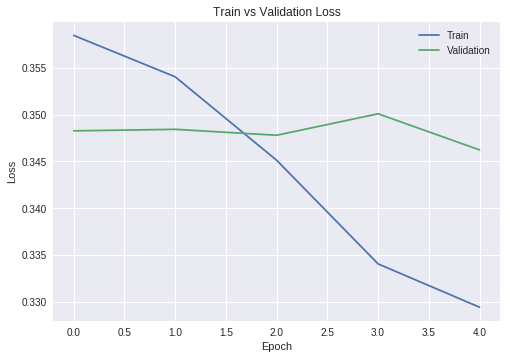

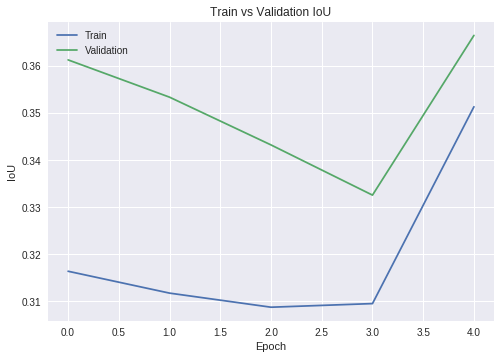

In [15]:
trainModel(net, train, valid, batch_size=2, num_epochs=5, checkpoint=False)

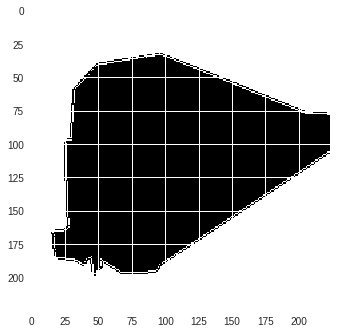

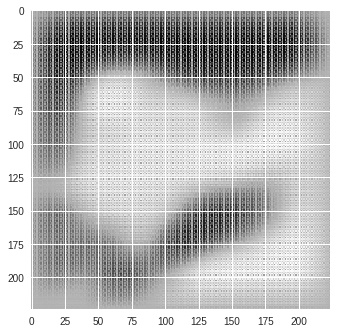

In [43]:
# After training
img, target = train_data[0]
out = net(img.unsqueeze(0))

target = target.squeeze(0).detach().numpy()
out = out.squeeze(0).squeeze(0).detach().numpy()

plt.imshow(target)
plt.show()
plt.imshow(out)